# Topic Overview 
Event studies offer a simple yet powerful framework for identifying causal effects by analyzing how outcomes change around the time of a specific event. The basic premise is to observe whether a noticeable shift in an outcome can be attributed to an event, such as a policy change, a market announcement, or even a personal superstition. However, distinguishing real effects from coincidental patterns requires careful reasoning about what would have happened in the absence of the event. This often involves constructing a counterfactual — an informed estimate of the outcome had the event not occurred — by drawing on historical trends, comparisons to similar units, or local averages. While conceptually intuitive, event studies face challenges due to time-varying confounders and random variation and are often best suited to short time horizons where the effect of an event is expected to appear quickly and clearly. 

## Learning Objectives 
- Perform event studies using methods developed for financial markets. 
- Perform event studies with multiple affected groups. 
- Use placebo tests with event studies. 

## 1.1 Lesson: Foundations of Event Studies
Event studies are perhaps the most basic kind of causal inference. The idea is to notice a change that occurred over time, when a particular event happened. However, that event was not the only thing that changed over time. Perhaps some other time-dependent variable caused the change? For example, could it be that the event was caused by: 
- the heat of the summer (as opposed to the winter), 
- the onset of the weekend (as opposed to the weekdays), 
- or the implementation of a particular law? 

### What are Event Studies?
When a major event happens, like a company announcing earnings or a new product launch, something in the data often shifts.  For example, a stock price might suddenly jump or drop right after the news is released. 

According to the **Efficient Market Hypothesis** 
- this reaction should be fast and short lived. 
- The market quickly absorbs all the relevant information from the announcement, and prices adjust accordingly. 
- After that, the effect fades, and the stock returns to moving with the usual market forces. 

In **event studies**, our goal is to figure out whether: 
- a specific change like a sudden spike in a stock's price was actually caused by the event or if it was just a coincidence. 

Did the announcement trigger the jump, or was the change due to something else happening at the same time: 
- a confounder? 
- Or maybe it wasn't a real change at all, a random fluctuation we're over analyzing. 

Event studies help us dig into this by looking at patterns before and after the event, comparing to similar cases, and estimating what would have happened without the event.  It's all about separating real impact from random noise. 

Here we see a stock price making a clear leap at a specific point in time. It looks like a strong signal, an obvious effect. But what if there were noise layered on top of that signal? Would the jump still stand out? That depends on the amount of noise. The stock price leaps up by five or six points. So if the noise stays within that range, the leap will likely still be visible.  But if the noise is larger, say fluctuations of 10 or more points, then the jump could get lost in the background. 

It might become hard to tell whether there was a meaningful change at all, but it also depends on how much data we have. More data means we have more ability to detect the leap. 

This illustrates a key idea in **event studies**: 
- Even real effects can be hard to detect if the surrounding noise is too high. 
- Signal clarity depends not just on the size of the effect, but on the level of randomness we're trying to see it through. 

Here is the same data, but with a large amount of noise on top. 
- Here it might be hard to see that there is a leap at 50 seconds. Again, a lot of it depends on the density of our samples. 
- With sparser data, we have a hard time detecting the leap up. With more frequent sampling, we could detect it. In this example, we can detect a non-zero treatment effect at the p = 0.05 level. 

There's also some evidence, though less strong, that the slope changed after the event. 

However, we can't detect a clear linear trend before the leap. In the code, 
- `x` represents a variable that increases linearly over time, while treated is a step function that turns on after the event. So a significant coefficient on x means we can detect a linear trend before the event. 
- A significant coefficient on `treated` means we detect a clear jump at the event. 
- And a significant coefficient on `x_treated`, the interaction between x and treated indicates a change in slope after the event. 

For any of these effects to be considered statistically significant, the t-value must exceed 1.96, which corresponds to the conventional p less than 0.05 threshold. 

This gives us a structured way to test whether a sudden change or a change in trend is statistically
meaningful. That is, it's not just random noise.

A further example of event studies is superstitions. 

For example, 
- if an event occurs (you begin wearing a new jacket to baseball games) and it seems to cause an effect (your team begins to win the games), then did the event cause the effect? Of course, one way to rule out this superstition might be that you may not believe that there can be any causal (physical) mechanism that would connect the jacket wearing with the baseball wins. 
- But suppose you’re willing to allow that there might be some possibly supernatural mechanism. Then one simple way to check would be to see if the team really began to win the games when you started to wear the jacket — or whether it actually started to win a bit before or a bit after that. 
- If you notice that the winning streak actually began a month prior to the jacket or if it began a month after, then it seems likely that the jacket is not the cause. 
- You might also want to check if the pattern is consistent with chance — maybe the winning streak is really just random noise. 
- If your team won 4 out of 10 games prior to the jacket-wearing but 6 out of 10 after, that doesn’t seem like enough of a difference to remove all doubts as to the origin of the change. 

### Prediction and Deviation
We need to predict what would have happened in the absence of the event. In the previous example, we ask ourselves: What would have happened if we hadn’t worn the jacket? Perhaps the team would have won 4 out of 10 games, as it did before. This means that the 2/10 increase can be attributed to the event (assuming it’s not noise). There are at least three ways to predict this counterfactual: 

1. Assume that what happened before the event is what would happen after. Thus, the 4/10 wins before would translate to 4/10 after. 
2. Assume that any trends will continue. Thus, if the team is gradually winning more and more games, that trend might be ongoing. If the team won 1 of the first 5 games and 3 of the next 5, will it win 5 of the 5 after that? (Increasing by 2 every 5 games.) That might be our conclusion if we assume a linear trend. Perhaps then our team won more games not because of the jacket but because it was on an upward trend overall. 
3. We can compare our trend to similar cases. For example, if we look at other teams similar to ours — say, other teams that won only a few games — did they win more and more games after we started to wear the jacket? If so, then it seems unlikely that the jacket was the cause; something else was causing the change. Perhaps it was regression to the mean: Teams that win fewer games by chance are likely to return to an average number of wins. Of course, it is also possible that the jacket magically affected all teams like ours.

Note that in case (1), we must convince ourselves that the trend is level — we do not want to assume there is no trend if there actually is one. Or we could consider the data only in the immediate vicinity of the event (a few games before and after the jacket is first worn). 

In all cases, event studies usually analyze a fairly short post-event time period, also known as a “short horizon.” Thus, if our wins increase from 1 of 5 to 3 of 5 to 5 of 5, it would be unreasonable (and, indeed, impossible) to expect them to then increase to 7 of 5 and 9 of 5. 



## 1.2 Lesson: Event Study Methods and Models

### Event Studies in the Stock Market

#### Event Studies
Measure how events impact a company's stock price
- earnings announcements
- product launches
- regulatory changes
- mergers 

**Fundamental question:** *Did the event cause a significant change in the stocks return?*

We need to be able to compare the event against it's counterfactual - Estimate what the stock's return **would have been** if the event had not occurred. 

An event study of the stock market would likely have these components:
1. **The Estimation Period** - The period before the event providing the baseline data used to estimate the normal return of the stock (what we'd expect it to return if the event never happened)
2. **The Event Window/Observation Period** - This includes the event day and a few days before and after, we use this window to observe how the stock actually behaves around the time of the event. 
3. **An Abnormal Return (AR)** - The difference between an abnormal return and the predicted return. If this value is significantly different from 0, it suggests that the event had a real effect on the stock's performance. 

#### To Calculate Abnormal Returns:
- **The Mean Adjusted Returns Model:*** Assumes the stock's predicted return is simply its historical average return over the estimation period
    - Very easy to use, but very basic, not accounting for broader market trends or influences.
- **The Market-Adjusted Returns Model:** Assumes the stock's return should move in line with a market index like the S&P 500.
    - Good for controlling for market-wide movements, but assumes all stocks are equally sensitive to the market, which isn't always true.
    - This model only works if the event doesn't effect the entire market.
- **The Market Model:** A more refined approach that uses regression analysis to estimate how the stock typically moves relative to the market.
    - The regression provides 3 key parameters:
    1. **$\alpha$ (alpha):** This captures the stock's average return that is not explained by the market.
    2. **$\beta$ (beta):** This measures how sensitive the stock is to movements in the overall market.
    3. **$\varepsilon$ (epsilon):** This is the residual or the error term - the part of the return that can't be explaiend by the model.
    $$\mathbf{Outcome}_t = \alpha + \beta \cdot \left(\text{Market return at time } t \right) + \varepsilon$$

#### Event STudies
- Help us isolate the **causal impact** of an event, including
    - Pre-event abnormal returns
    - Post-event abnormal returns

To help determine whether the abnormal returns are truly meaningful, we could use a statistical test such as a T-test. 

#### T-Test
Helps assess whether the observed returns differ from what would normally happen. For example, if the abnormal return is positive but falls within the range of typical daily fluctuations, we might not conclude that the event had a significant effect. 

 
Stock returns do not necessarily exhibit persistent trends: 
- Just because a stock increased by 5% in January does not imply it will increase by another 5% in February. 
- If things were that simple, it would be easy to make a lot of money in the stock market: just sell off all the low-return stocks and buy the high-return ones. 
- But this strategy doesn’t work consistently, as future returns are not predictable solely from past returns. 

However, we need some model to guess the counterfactual: What would have happened without a given event? Suppose we own shares in a clothing corporation, and the company announces unexpectedly strong quarterly earnings. 

We start by picking an “estimation period” prior to an event and an “observation period” after it. Our goal then is to estimate the stock’s predicted return in both periods (even though we know the actual return in both). 

The following models might work:

1. **Mean-Adjusted Returns Model:**  The predicted return in the estimation period is the mean return from that period.
- The predicted return in the observation is the same
- The abnormal return (AR) is just the data minus this mean return.
- Thus, if the stock return was 5% in the estimation period, a flat trend is assumed where the expected return in the observation is also 5%.
- If the return increased to 10%, then the abnormal return is 5%.
- Note: When comparing returns across periods, ensure they are normalized to the same time scale (e.g., weekly return vs. monthly return), or annualized appropriately. Otherwise, differences may reflect duration rather than performance.

2. **Market-adjusted returns model:** The predicted return in the estimation period is the market return in that period — the average return for all stocks. 
- The predicted return in the observation period is the market return in the observation period. 
- This model assumes that the event only affected the individual stock and not the broader market. 
- If the event had a broader economic impact, the market return would no longer serve as a valid counterfactual. 
- If the market return increased from 5% to 10%, that was because of external factors, not because of the clothing corporation’s profit announcement. 
- If the profit announcement was somehow so important that the market was affected by it, then the market return is a poor predictor of what the target return “would have been.” 
- However, if we can use the market return, then the abnormal return is relative to the market return, whether in the estimation or observation period.

3. **Market model:** Using historical data from the estimation period, we can fit a linear regression of the target stock's returns ($\mathbf{R}$) on market returns ($\mathbf{R}_\text{market}$), estimating parameters $\alpha$ (alpha) and $\mathbf{\beta}$ (beta) in the equation:
$$\mathbf{R} \; = \;  \alpha + \beta \times \mathbf{R}_\text{market} + \varepsilon$$
- We fit the alpha and beta on $\mathbf{R}$ and $\mathbf{R}_\text{market}$ in the estimation period, and we can then use alpha and beta to predict $\mathbf{R}$ in both periods from $\mathbf{R}_\text{market}$ in both periods.
- #2 is a special case of this where we assume that $\alpha = 0$ and $\beta = 1$, while #1 assumes $\beta = 0$.
- we can then compute the **AR**, which is the actual $\mathbf{R}$ minus the predicted $\mathbf{R}$ (which is the residual of the regression). 
    - A statistically significant **AR** before the event may indicate information leakage or market anticipation. 
    - A rising **AR** could suggest that some investors had prior knowledge of the positive earnings surprise. Since something out of the ordinary was happening prior ot the event, perhaps we "should have known" that the event was coming
- After the event, the **AR** is assumed to result from the event. It will usually stop changing just after the event, as demonstrated by the **Efficient Market Hypothesis:** The target return stops increasing or decreasing relative to the market return because all of the effect has been priced in already.
- Statistical tests, such as a t-test, can be used to assess whether abnormal returns around the event date are significantly different from zero, controlling for normal return variation. This helps determine whether the event had a measurable impact. For instance, we might use a t-test that compares the AR on the day after the event with the standard deviation of ARs, measured from the estimation period. 

### Event Studies with Regression

#### Event Studies With One Group
This event study assumes that there might be a change in the value of the data after the event ($\beta_2$) or a change in the slope of the trend ($\beta_3$).

**Basic Regression Model:** Break down event into key components:
$$ \text{Outcome} \; = \; \beta_0 + \beta_1 \cdot t + \beta_2 \cdot \text{After} + \beta_3 \cdot \left(t \times \text{After}\right) + \varepsilon$$

where:
- $t$ is the time, usually cnetered around the event (e.g., $t$ = 0 on the event date)
- $\text{After}$: A binary indicator that equals $1$ after the event, and $0$ before
- $t \times \text{After}$ an interation term that allows the trend to change after the event (the product of the two).

**How to interpret the coefficients:**
- $\beta_0$ - the expected outcome at time zero (often just before the event)
- $\beta_1$ - the trend in the outcome before the event (slope of the line)
- $\beta_2$ - the immediate level shift after the event (a jump up or down)
- $\beta_3$ - the change in the trend after the event (a new slope)


While this model can be powerful, its validity depends on some important assumptions:
- **linearity:** it assumes linearity — both before and after the event. If the true relationship isn’t linear, adding higher-order polynomial terms might help, but this increases the risk of overfitting, especially with limited data.
- **no autocorrelation:** if the datapoints are correlated over time (which is common in timeseries) there might look like there is an event effect when there isn't. the risk of this increases if the event date was chosen after noticing a trend.
- **no confounding events:** other events happening around the same time can distort the analysis. 


This event study assumes that there might be a change in the value of the data after the event ($\beta_2$) or a change in the slope of the trend ($\beta_3$).


Second, and more subtly, the presence of **autocorrelation** can create the illusion of a meaningful slope change even when no event effect exists. 

For example:
- If a stock tends to move in the same direction for several periods — a behavior known as momentum or “inertia” — you might observe an upward trend after the event purely by chance. 
- In such cases, the model could mistakenly attribute this autocorrelated trend to the event itself, inflating the estimate of $\beta_3$. 
- This is particularly problematic when the event date is selected ex post, based on when such a trend appears to begin.

### Event Studies with Multiple Affected Groups:
When you're analyzing how an event affects multiple entities, such as a portfolio of 10 stocks or regions. You have several modeling choices, each with tradeoffs:
#### Approach 1:
Average all the individual time series into a single composite series and apply the single-group model. We could average together the 10 time series, ignoring any differences between the 10 stocks. This is easy to implement, but assumes all groups are affected in the same way, ignoring variation between them.
#### Approach 2: 
Run the basic regression model separately for each stock or unit. This allows for individual differences in response. No information is pooled, making it hard to detect patterns or common effects.
#### Approach 3: 
Pool all the data and include a fixed effect for each group. (where there is a fixed effect $beta_i$ for group $i$) and an event study (where there is a different trend and intercept before the event vs. after). Thus:

$$Y_{it} \; = \; \beta_i + \beta_1 \cdot t + \beta_2 \cdot \text{After} + \beta_3 \left(t \cdot \text{After}\right) + \varepsilon_{it}$$

where, 
- $Y_{it}$ is the outcome for group $i$ at time $t$. 
- $\beta_1$ captures group-specific baseline levels (fixed effects). 
- $\beta_1, \beta_2, \beta_3$ are assumed to be constant across all groups. 

This model controls for group differences in baseline levels, uses pooled data for more statistical power, however, it assumes the groups share the same trend in response to the event, which may not be realistic. 

#### Approach 4:
Model the average outocme across groups at each point in time. This model looks like
$$Y_t = \beta_0 + \beta_t + \varepsilon_{it}$$

- $\beta_t$ captures the deviation fromt he baseline at each time point.
- no trend is explicitly modeled, the focus is on time-specific shifts. its flexible and simple to estimate, and useful for exploratory analysis, but it doesn't account for underlying patterns 

Suppose that news of a merger may have affected any of 10 different stocks. Each stock has its own time series. We’ll call one stock a “group,” in the sense of a group of samples. What are our options? 

1. We could average together the 10 time series, ignoring any differences between the 10 stocks. 
2. We could treat each stock separately, running a separate event study for each one. 
3. We do a cross between a fixed effects study (where there is a fixed effect $beta_i$ for group $i$) and an event study (where there is a different trend and intercept before the event vs. after). Thus:
$$Y_{it} \; = \; \beta_i + \beta_1t + \beta_2, \text{After} + \beta_3 \left(t \times \text{After}\right) + \varepsilon_{it}$$

This assumes that all stocks have the same linear trend before and after ($\beta_1$ vs. $\beta_1 + \beta_3$) and the same discontinuous effect before/after ($\beta_2$). 

(This equation assumes that we have taken an average over $i$ at each time step $t$, as in #1.)

This just identifies the estimated value at each time ﻿t﻿, with no assumption of a linear trend. The estimated $beta_t$ is just the mean value of all stocks at the given time $t$, where $\beta_0$ is for the period just before the event, so the estimated value at time 0 is $\beta_0$ and the estimated value at another time $t$ is $\beta_0 + \beta_t$. 

For example, if we have $t = -1, 0$, and 1, with $t = 0$ being just before the event and $t = 1$ just after, then the predicted values will be $\beta_0 + \beta_{-1}$ at time $-1, \beta_0$ at time 0, and $\beta_0 + \beta_1$ at time 1. An equivalent formulation would be $\alpha (-1)$ at time $-1$, $\alpha_0$ at time 0, and $\alpha_1$ at time 1. Why separate out $\beta_0$? 

What you want is that a nonzero and significant $\beta_1, $\beta_2$, etc., implies some effect from the event, instead of having to consider effects like $\alpha_1 - \alpha _0$ with two parts. However, this method can’t control for a trend. E.g., if $\beta_{-2} = -2$, $\beta_{-1} = -1$, and $\beta_1 = 1$, then there appears to be a linear trend ($\beta$ increases by 1 point per time step); so even if $\beta_1$ is significant, it does not necessarily mean that there is an effect from the event. 

When you have multiple groups, it might not make sense to use the rest of the market as a counterfactual because it’s implausible that 10 groups were affected but the market wasn’t affected. You could only do this if you have reason to believe that the market was not affected by the event and all of these groups are affected.

## 1.3 Lesson: Time Series Forecasting and Model Validity

### Forecasting Properly with Time Series Methods
To predict the counterfactual, we really want time series with **Autoregressive Integrated Moving Average (ARIMA)** or something similar. The assigned reading this week considers **Autoregressive Moving Average (ARMA) only**.

**AR(1) (autoregression)** would mean that each value of $Y$ is regressed on the previous value:
$$Y_t = \beta_0 + \beta_1 Y_{t - 1} + \varepsilon$$

**AR(2)** would regress on the two previous values:
$$Y_t = \mu + \beta_1 Y_{t - 1} + \beta_2 Y_{t-2} + \varepsilon$$

Then a **MA(1)** (Moving average) would look like:
$$Y_t = \mu \left(\varepsilon_t + \theta\varepsilon_{t - 1}\right)$$

Where epsilons are assumed to be independent and identically (and normally) distributed with standard deviation sigma.

Because the decomposition of the error term into $\varepsilon_t$ and $\theta \varepsilon_{t-1}$ is unknown, we cannot use linear regression to compute this MA(1). However, if you know $\theta$, $\mu$, and $\varepsilon_0$, then you know the epsilons:

$$\varepsilon_t = Y_t - \mu - \theta \cdot \varepsilon_{t-1}$$

You can then predict the likelihood of the data by finding the a priori probability of each $\varepsilon_tT and multiplying them together. 

- You also need sigma if you are to guess this probability. You want to choose the mu, theta, sigma, and $\varepsilon_0$ that maximize this likelihood. 
- This is called maximum likelihood estimation. So, you guess $\theta$, $\mu$, $\sigma$, and $\varepsilon_0$ and iteratively improve on them. Just by guessing these four values, you can compute the moving average, and you can try to find the best possible values. 

We can then combine AR and MA to get an ARMA model like:

$$Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \left(\varepsilon_t + \theta \varepsilon_{t-1} \right)$$

Although the AR part of ARMA could be computed with linear regression, once the MA part is included, we must use maximum likelihood estimation instead due to the epsilons being unmeasurable. 

Other approaches include: ARIMA, ARIMAX, and SARIMAX.

### The Joint-Test Problem
The **joint-test problem** refers to the fact that when you test for the significance of an effect, you're not just testing whether the effect is zero — you're also implicitly assuming that your model is correctly specified. That is, your test result depends on both the presence of a real effect and the correctness of your model assumptions (e.g., functional form, independence, stationarity, no omitted variables). 

But since you can never fully verify that your model is correct, you’re never purely testing just the effect — you're also testing the validity of the model at the same time. This uncertainty limits how confidently we can interpret statistical significance. 

In causal inference, identifying the correct adjustment set (e.g., blocking back-door paths) depends on assumptions about the data-generating process that you can't directly test. 

**One way to partially address the joint-test problem is through placebo testing.** In a placebo test, you pretend that a treatment occurred at a time when it actually didn’t (or in a group that wasn’t treated) and then check whether your model still finds a "significant" effect. If it does, that’s a red flag: Your model may be picking up patterns in the data that are unrelated to the actual event. 

For example, suppose your model interprets oscillations in a stock price as evidence of an event-driven effect — but similar oscillations occur throughout the dataset, regardless of any events. Then the model might falsely flag significance both during the real event and during the placebo window. That would indicate your model is responding to general features of the data, not to the event itself. To address this, you might do many placebo tests (say, 1,000) and check the distribution of the effects. If the main event is stronger than 95% of the placebo events, then you have, in effect, a p < 0.05 result. 

**Treatment variable:** The variable we want to know the effect of. How does it affect the outcome?

**Counterfactual:** In research, a counterfactual refers to a hypothetical situation that contrasts with what actually happened, essentially exploring what might have been if a specific event or condition had been different. It's a way to understand the potential impact of a particular intervention or factor by imagining an alternative scenario and comparing it to the real-world outcome. 

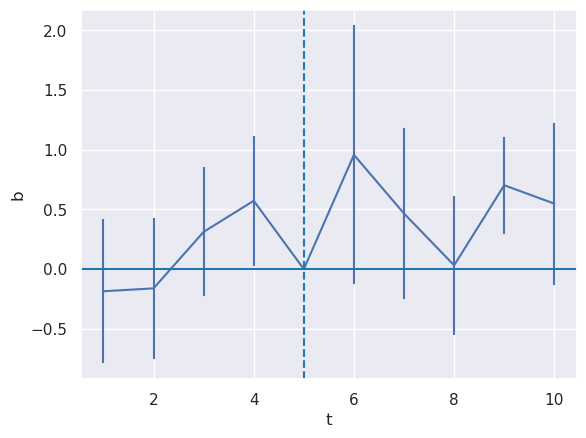

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn.objects as so
import matplotlib.pyplot as plt
# Use a seed to make the results consistent
rng = np.random.default_rng(10)
# Ten groups with ten periods each
id = pd.DataFrame({'id': range(0,10), 'key': 1})
t = pd.DataFrame({'t': range(1,11), 'key': 1})
d = id.merge(t, on = 'key')
# Add an event in period 6 with a one-period effect
d['Y'] = rng.normal(0,1,100) + 1*(d['t'] == 6)

# Estimate our model using time 5 as reference
m = smf.ols('Y~C(t, Treatment(reference = 5))', data = d)

# Fit with SEs clustered at the group level
m = m.fit(cov_type = 'cluster',cov_kwds={'groups': d['id']})

# Get coefficients and CIs 
# The original table will have an intercept up top
# But we'll overwrite it with our 5 reference
p = pd.DataFrame({'t': [5,1,2,3,4,6,7,8,9,10],
    'b': m.params, 'se': m.bse, 
    'ci_top': list(m.conf_int().iloc[:,1]),
    'ci_bottom': list(m.conf_int().iloc[:,0])})
# Add our period-5 zero
p.iloc[0] = [5, 0, 0, 0, 0]

# Plot the estimates as connected lines with error bars
fig = plt.figure()
(so.Plot(p, x = 't', y = 'b', ymax = 'ci_top', ymin = 'ci_bottom')
 .on(fig).add(so.Line()).add(so.Range()).plot())
fig.axes[0].axvline(5, linestyle = '--')
fig.axes[0].axhline(0)

In [3]:
d

,id,key,t,Y
0,0,1,1,-1.103338
1,0,1,2,-0.725025
2,0,1,3,-0.781805
3,0,1,4,0.266976
4,0,1,5,-0.248581
...,...,...,...,...
95,9,1,6,0.526401
96,9,1,7,-0.086423
97,9,1,8,0.386684
98,9,1,9,1.734767


In [8]:
coding = 430 / 440
reading = 102 / 110
reflections = 97 / 100
yellowdig = 100 / 100 

current_grade = (coding * .52) + (reading * .14) + (reflections * .32) + (yellowdig * .02)
print(f"Current grade: {current_grade:.2%}")

Current grade: 96.84%


In [7]:
import numpy as np
import statsmodels.api as sm

# simulate one dataset
num = 10_000
Z = np.random.normal(0, 1, num)
X = Z + np.random.normal(0, 1, num)
# note the heteroskedastic noise: variance = X**2
Y = 1.5*X + 2.3*Z + np.random.normal(0, X**2, num)

# fit OLS
XZ = sm.add_constant(np.column_stack((X, Z)))
model = sm.OLS(Y, XZ).fit()

# grab the (model‐based) standard error of β_X
se_model = model.bse[1]   # index 1 corresponds to X
print("Model-based SE of β_X:", se_model)

Model-based SE of β_X: 0.03328759427785401


In [6]:
import numpy as np
import statsmodels.api as sm

def one_beta():
    Z = np.random.normal(0, 1, num)
    X = Z + np.random.normal(0, 1, num)
    Y = 1.5*X + 2.3*Z + np.random.normal(0, X**2, num)
    XZ = sm.add_constant(np.column_stack((X, Z)))
    return sm.OLS(Y, XZ).fit().params[1]  # β̂_X

# run 100 MC replications
num = 10_000
M = 100
betas = np.array([one_beta() for _ in range(M)])

se_empirical = betas.std(ddof=1)
print("Empirical SE of β_X (across 100 sims):", se_empirical)

Empirical SE of β_X (across 100 sims): 0.05640550831670762
